In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.losses import MSE

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
img = np.array(load_img("../datasets/panda.jpg", target_size=(50, 50)))

In [ ]:
plt.imshow(img)

In [21]:
gray = img.mean(axis=2) / 255

In [42]:
flatten = gray.flatten()

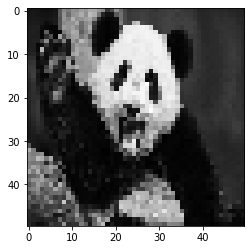

In [22]:
plt.imshow(gray, cmap="gray")

In [23]:
gray.max()

0.9830065359477124

In [43]:
population = np.random.uniform(0, 1, (1000, *flatten.shape))

In [44]:
population.shape

(1000, 2500)

In [45]:
population.min(), population.max()

(1.3672119802965454e-07, 0.9999983900716912)

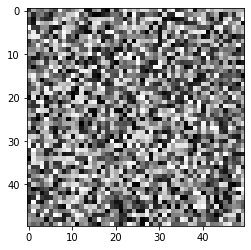

In [46]:
plt.imshow(population[100].reshape(*gray.shape), cmap="gray")

In [48]:
errors = MSE(flatten, population).numpy()

In [49]:
population.shape

(1000, 2500)

In [50]:
gray.shape

(50, 50)

In [52]:
fittest_idx = errors.argsort()[:20]

In [53]:
fittest_idx

array([151, 513, 768, 306, 779, 543,   7, 342, 296, 428, 408, 774, 738,
       533, 735, 451, 392, 305, 460,  40])

In [54]:
fittest = population[fittest_idx]

In [56]:
fittest.shape

(20, 2500)

In [57]:
parent_one = fittest[np.random.randint(0, fittest.shape[0], population.shape[0])]

In [59]:
parent_two = fittest[np.random.randint(0, fittest.shape[0], population.shape[0])]

In [62]:
select_one = np.random.randint(0, 2, parent_one.shape)
select_two = 1 - select_one

In [67]:
repop = parent_one * select_one + parent_two * select_two

In [68]:
(parent_one * select_one)[5][:30]

array([0.55849078, 0.10118652, 0.        , 0.        , 0.        ,
       0.52670068, 0.        , 0.75691675, 0.73067129, 0.        ,
       0.2790909 , 0.        , 0.1675703 , 0.        , 0.58881075,
       0.90719377, 0.        , 0.        , 0.79713435, 0.73315091,
       0.30782831, 0.97248847, 0.62330474, 0.18544136, 0.        ,
       0.15980095, 0.        , 0.        , 0.11614673, 0.74770254])

In [69]:
(parent_two * select_two)[5][:30]

array([0.        , 0.        , 0.96950441, 0.06834177, 0.42722296,
       0.        , 0.11639315, 0.        , 0.        , 0.07560079,
       0.        , 0.20592107, 0.        , 0.68586043, 0.        ,
       0.        , 0.96790609, 0.38554613, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.28793851,
       0.        , 0.62016551, 0.58034646, 0.        , 0.        ])

In [70]:
repop[5][:30]

array([0.55849078, 0.10118652, 0.96950441, 0.06834177, 0.42722296,
       0.52670068, 0.11639315, 0.75691675, 0.73067129, 0.07560079,
       0.2790909 , 0.20592107, 0.1675703 , 0.68586043, 0.58881075,
       0.90719377, 0.96790609, 0.38554613, 0.79713435, 0.73315091,
       0.30782831, 0.97248847, 0.62330474, 0.18544136, 0.28793851,
       0.15980095, 0.62016551, 0.58034646, 0.11614673, 0.74770254])

In [71]:
mutatio_vals = np.random.randn(*population.shape)*.1

In [74]:
population = repop + mutatio_vals